In [1]:
#!pip install keras

In [2]:
import os
import sys
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report,accuracy_score
#from keras.utils.np_utils import to_categorical
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split,cross_validate
from tensorflow.keras.optimizers import Adam
from keras.layers import Dropout
from keras import regularizers
from keras.callbacks import EarlyStopping
import warnings
warnings.filterwarnings('ignore')

In [3]:
dataset=pd.read_csv("Heart_Disease_Prediction.csv")

In [4]:
dataset.head(7)

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence
5,65,1,4,120,177,0,0,140,0,0.4,1,0,7,Absence
6,56,1,3,130,256,1,2,142,1,0.6,2,1,6,Presence


In [5]:
dataset.tail(7)

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
263,49,1,2,130,266,0,0,171,0,0.6,1,0,3,Absence
264,48,1,2,110,229,0,0,168,0,1.0,3,0,7,Presence
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,Absence
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,Absence
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,Absence
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,Absence
269,67,1,4,160,286,0,2,108,1,1.5,2,3,3,Presence


In [6]:
dataset.shape

(270, 14)

In [7]:
dataset.describe()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000


In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

In [9]:
dataset.dtypes

Age                          int64
Sex                          int64
Chest pain type              int64
BP                           int64
Cholesterol                  int64
FBS over 120                 int64
EKG results                  int64
Max HR                       int64
Exercise angina              int64
ST depression              float64
Slope of ST                  int64
Number of vessels fluro      int64
Thallium                     int64
Heart Disease               object
dtype: object

In [10]:
dataset.isnull().sum()

Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64

In [11]:
dataset.duplicated().sum()

0

In [12]:
colmn=list(dataset.columns)
category_variable=[]
numeric_variable=[]
for j in colmn:
    if len(dataset[j].unique())>6:
        numeric_variable.append(j)
    else:
        category_variable.append(j)
print("Categorical Features:",*category_variable)
print("Numerical Features:",*numeric_variable)

Categorical Features: Sex Chest pain type FBS over 120 EKG results Exercise angina Slope of ST Number of vessels fluro Thallium Heart Disease
Numerical Features: Age BP Cholesterol Max HR ST depression


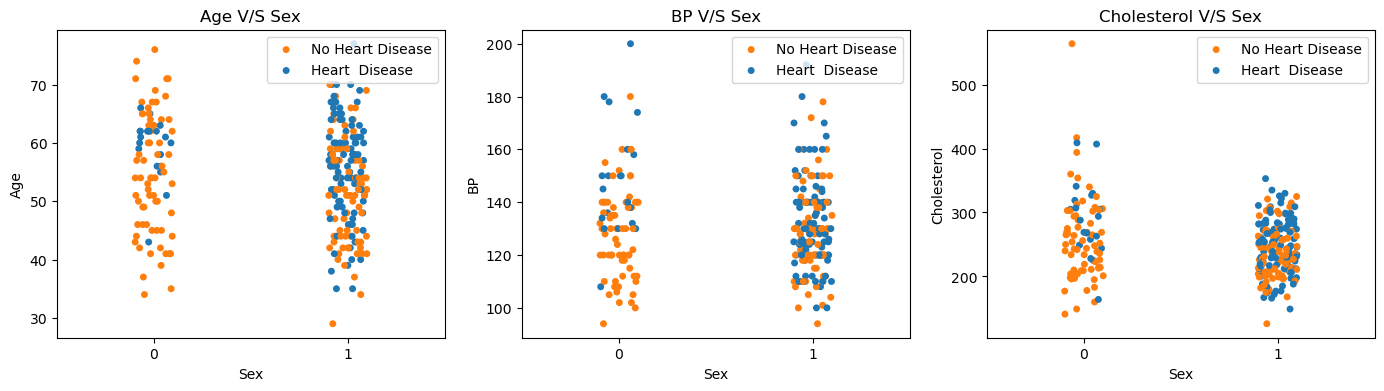

In [13]:
fig,ax=plt.subplots(nrows=1,ncols=3,figsize=(17,4))
for k in range(3):
    plt.subplot(1,3,k+1)
    sns.stripplot(x="Sex",y=numeric_variable[k],data=dataset,hue="Heart Disease");
    plt.legend(["No Heart Disease","Heart  Disease"])
    title=numeric_variable[k] + " V/S Sex"
    plt.title(title);

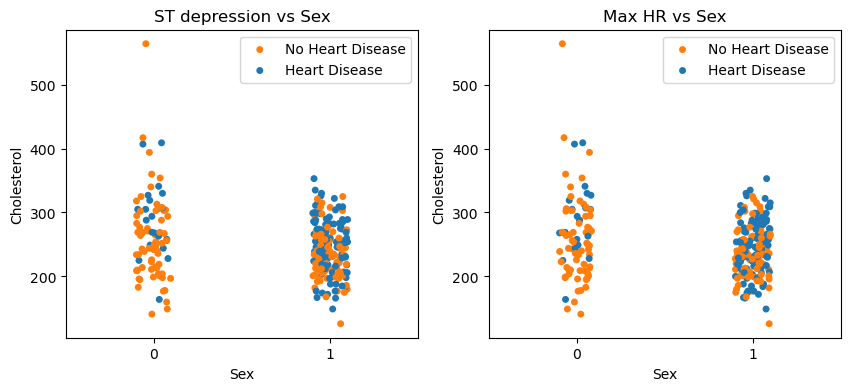

In [14]:
fig,ax=plt.subplots(nrows = 1,ncols =2,figsize=(10,4))
for l in [-1,-2]:
     plt.subplot(1,2,-l)
     sns.stripplot(x="Sex",y=numeric_variable[k],data=dataset,hue="Heart Disease");
     plt.legend(["No Heart Disease","Heart Disease"])
     title = numeric_variable[l] + " vs Sex"
     plt.title(title);

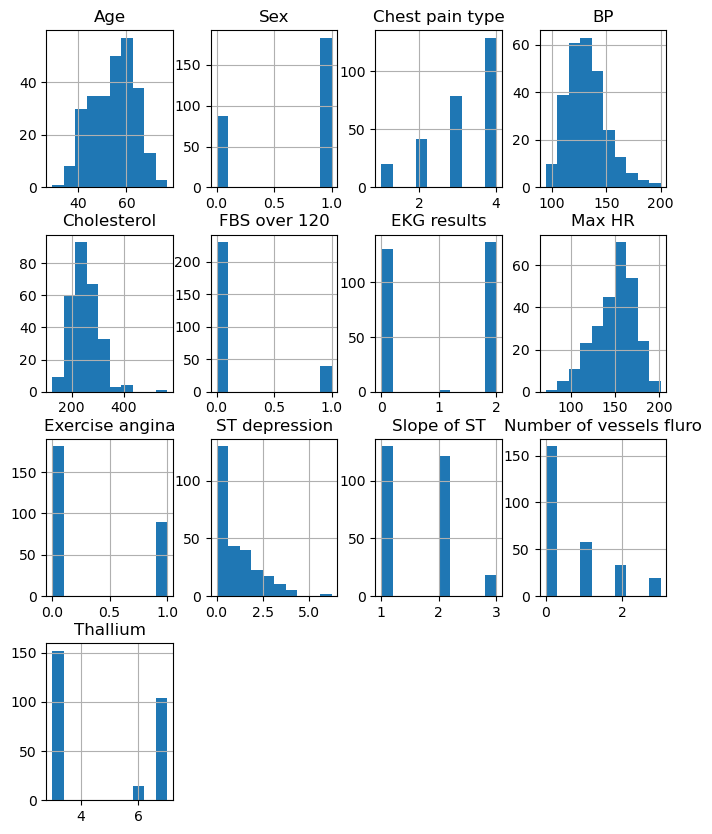

In [15]:
figures=plt.figure(figsize=(8,10))
ax=figures.gca()
dataset.hist(ax=ax)
plt.show()

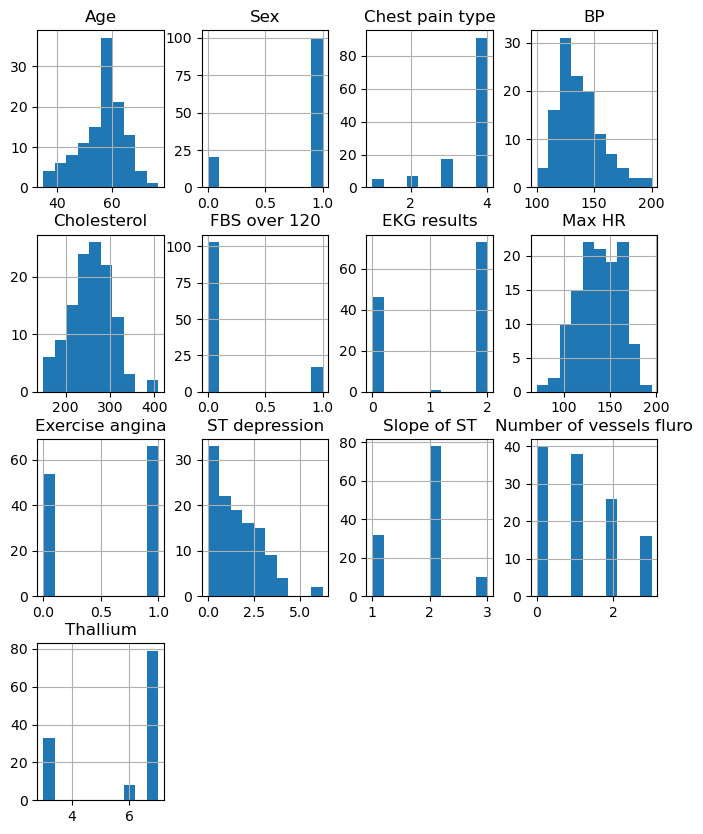

In [16]:
dataset_copy=dataset[dataset["Heart Disease"]=="Presence"]
column=dataset.columns[:14]
figures=plt.figure(figsize=(8,10))
ax=figures.gca()
dataset_copy.hist(ax=ax)
plt.show()

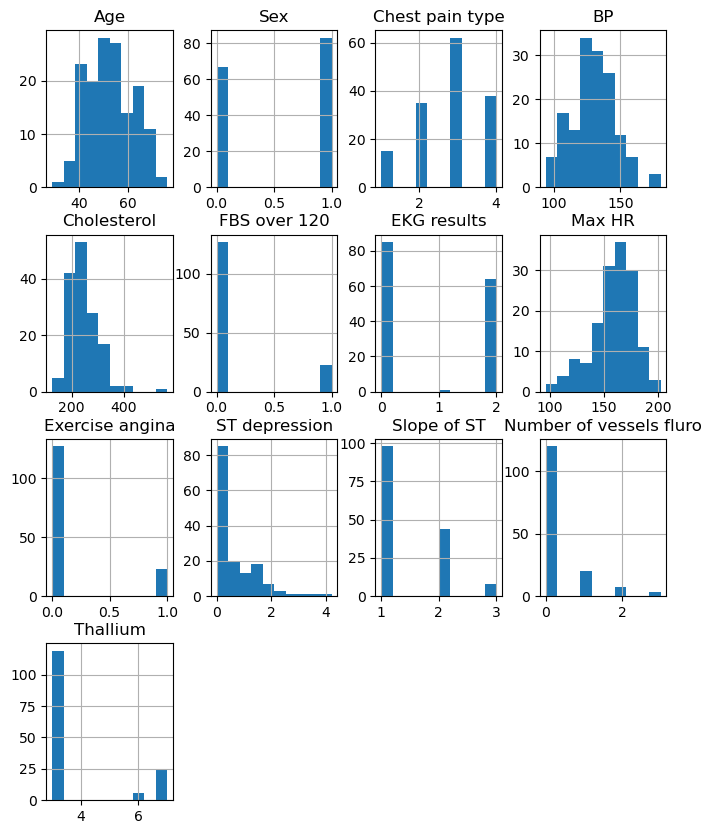

In [17]:
dataset_copy=dataset[dataset["Heart Disease"]=="Absence"]
column=dataset.columns[:14]
figures=plt.figure(figsize=(8,10))
ax=figures.gca()
dataset_copy.hist(ax=ax)
plt.show()

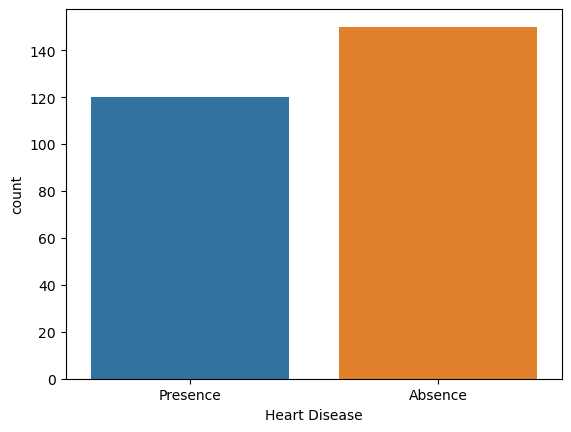

In [18]:
sns.countplot(x="Heart Disease",data=dataset)
plt.show()

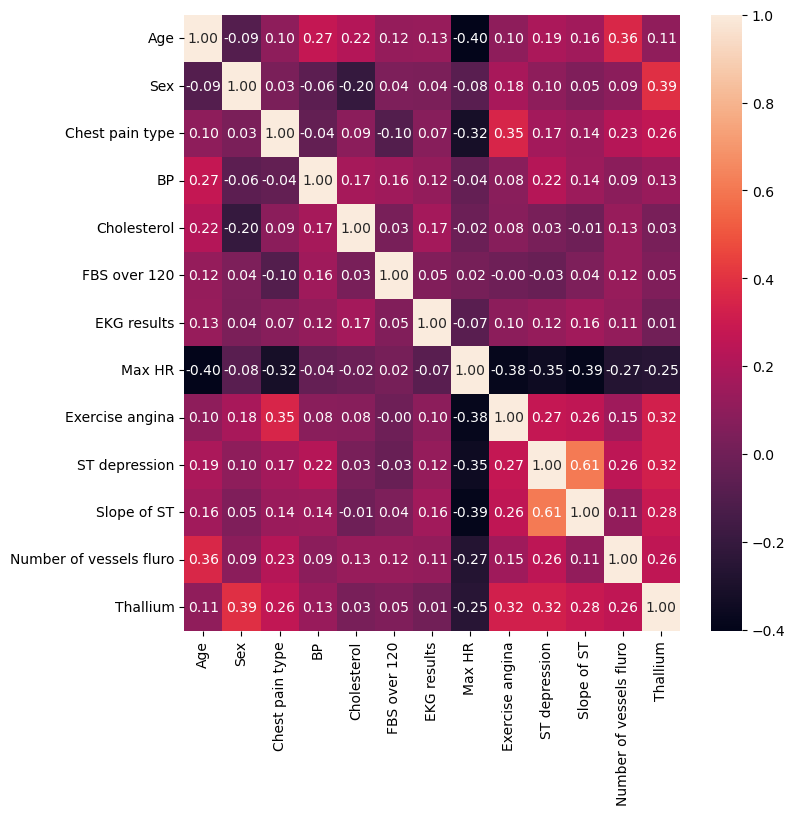

In [19]:
plt.figure(figsize=(8,8))
sns.heatmap(dataset.corr(),annot=True,fmt=".2f")
plt.show()

In [20]:
dataset["Heart Disease"].value_counts()

Absence     150
Presence    120
Name: Heart Disease, dtype: int64

<AxesSubplot:xlabel='Max HR', ylabel='Density'>

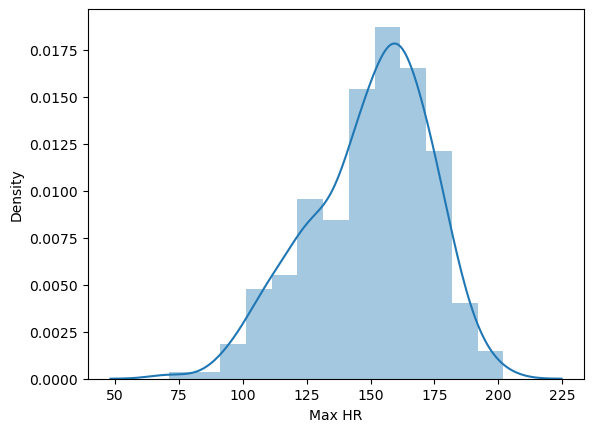

In [21]:
sns.distplot(dataset["Max HR"],kde=True)

<AxesSubplot:ylabel='None'>

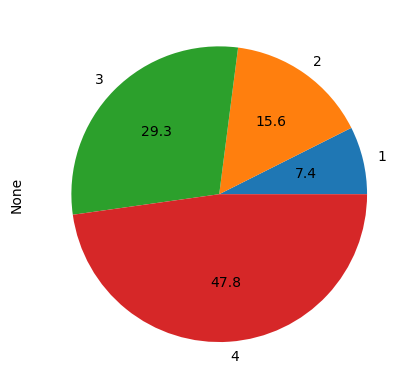

In [22]:
dataset.groupby("Chest pain type").size().plot(kind="pie",autopct="%.1f")

<AxesSubplot:ylabel='None'>

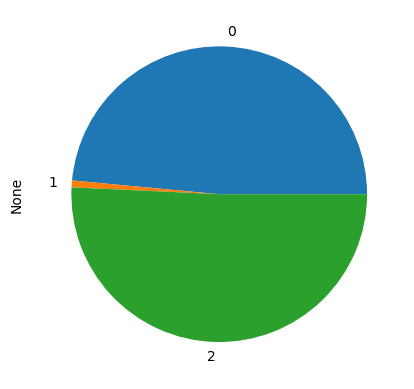

In [23]:
dataset.groupby("EKG results").size().plot(kind="pie")

<AxesSubplot:xlabel='Age', ylabel='Density'>

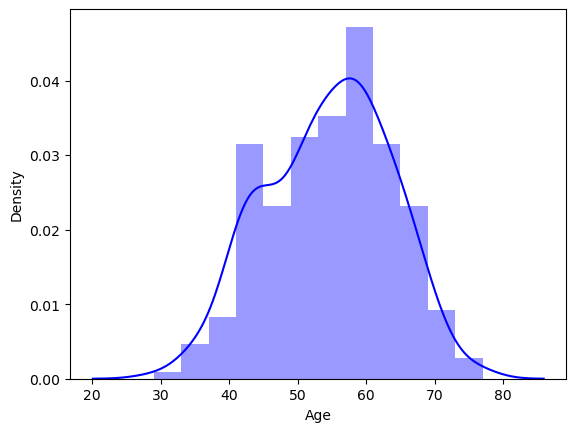

In [24]:
sns.distplot(dataset["Age"],kde=True,color="blue",hist=True)

<AxesSubplot:ylabel='None'>

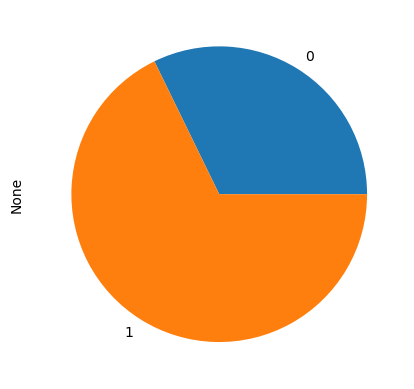

In [25]:
dataset.groupby("Sex").size().plot(kind="pie")

<AxesSubplot:xlabel='BP', ylabel='Density'>

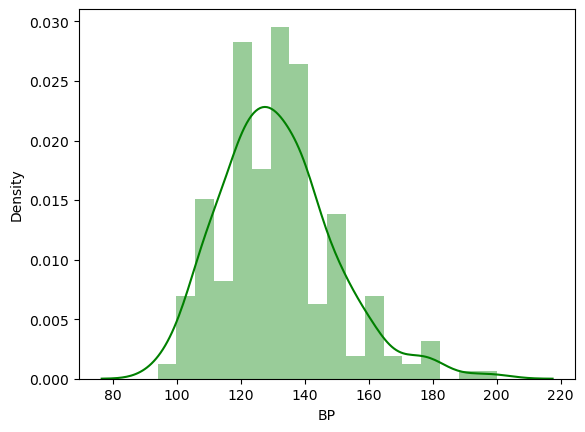

In [26]:
sns.distplot(dataset["BP"],kde=True,color="green",hist=True)

<AxesSubplot:xlabel='Heart Disease', ylabel='Age'>

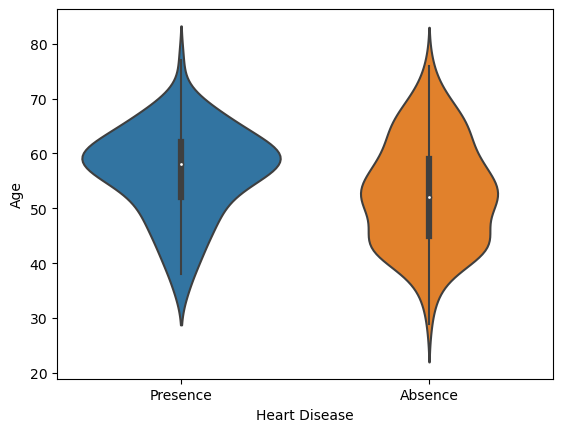

In [27]:
sns.violinplot(x=dataset["Heart Disease"],y=dataset["Age"])

<AxesSubplot:xlabel='Sex', ylabel='Heart Disease'>

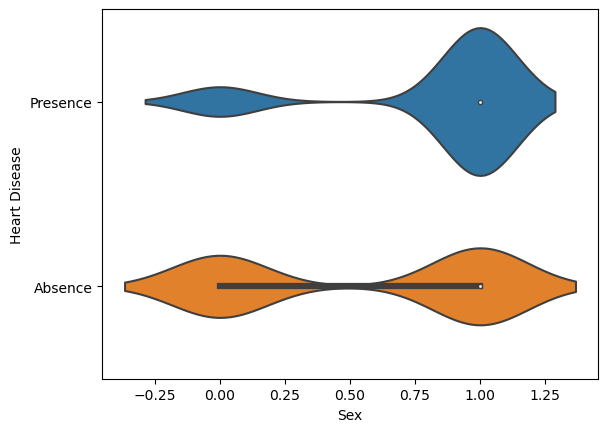

In [28]:
sns.violinplot(x=dataset["Sex"],y=dataset["Heart Disease"])

<AxesSubplot:xlabel='Exercise angina', ylabel='Heart Disease'>

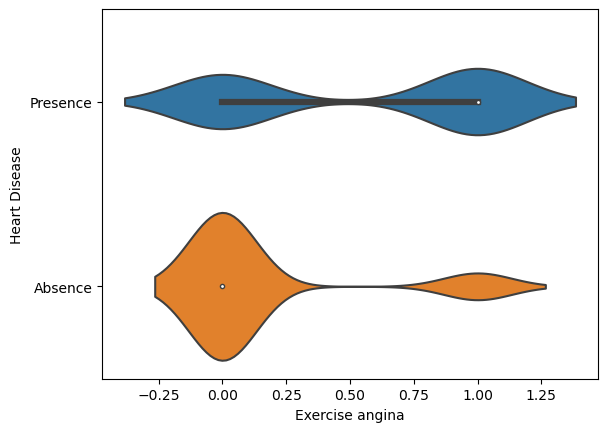

In [29]:
sns.violinplot(x=dataset["Exercise angina"],y=dataset["Heart Disease"])

<AxesSubplot:xlabel='FBS over 120', ylabel='Heart Disease'>

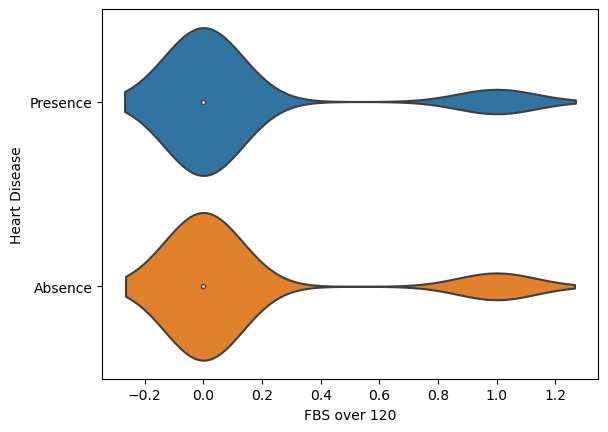

In [30]:
sns.violinplot(x=dataset["FBS over 120"],y=dataset["Heart Disease"])

#### A

In [31]:
# Create Dummy Varaiables
heartdisease=pd.get_dummies(dataset["Heart Disease"],drop_first=True)

In [32]:
# Concantenate the DataFrames
dataset=pd.concat([dataset,heartdisease],axis=1)

In [33]:
heartdisease

,Presence
0,1
1,0
2,1
3,0
4,0
...,...
265,0
266,0
267,0
268,0


In [34]:
X=dataset.drop("Heart Disease",axis=1)
Y=heartdisease

In [35]:
# Splitting the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [36]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [37]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [38]:
X_train

array([[ 0.2468849 ,  0.66539319,  0.81803947, ..., -0.72413882,
         0.62605955, -0.93342762],
       [-1.18040026,  0.66539319, -1.25725529, ..., -0.72413882,
        -0.91731335, -0.93342762],
       [-0.0824886 ,  0.66539319,  0.81803947, ...,  0.31269631,
         1.14051719,  1.07132034],
       ...,
       [ 0.2468849 , -1.50287082,  0.81803947, ..., -0.72413882,
        -0.91731335, -0.93342762],
       [-0.4118621 ,  0.66539319, -0.21960791, ..., -0.72413882,
        -0.91731335, -0.93342762],
       [-0.63144443, -1.50287082,  0.81803947, ..., -0.72413882,
        -0.91731335, -0.93342762]])

In [39]:
Y_train

,Presence
84,0
251,0
92,1
201,1
126,1
...,...
20,1
188,0
71,0
106,0


In [40]:
X_train.shape

(189, 14)

In [41]:
Y_train.shape

(189, 1)

In [42]:
X_test.shape

(81, 14)

In [43]:
Y_test.shape

(81, 1)

In [44]:
# Importing the Keras Libraries and Packages for ANN
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout

In [45]:
# Initializing the ANN
ANN_model=Sequential()
# Adding the Input layer and the First Hidden Layer
ANN_model.add(Dense(units=6,kernel_initializer='glorot_uniform',activation='relu',input_dim=X_train.shape[1]))
# Adding the Second Hidden Layer
ANN_model.add(Dense(units=6,kernel_initializer='glorot_uniform',activation='relu'))
# Adding the output layer
ANN_model.add(Dense(units=1,kernel_initializer='glorot_uniform',activation='sigmoid'))
# Compiling the ANN
ANN_model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [46]:
ANN_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 90        
                                                                 
 dense_1 (Dense)             (None, 6)                 42        
                                                                 
 dense_2 (Dense)             (None, 1)                 7         
                                                                 
Total params: 139 (556.00 Byte)
Trainable params: 139 (556.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [47]:
# Fitting the ANN to the Training set
ANN_record=ANN_model.fit(X_train,Y_train,validation_split=0.33,batch_size=20,epochs=100)

Epoch 1/100
7/7 [==============================] - 1s 35ms/step - loss: 0.7248 - accuracy: 0.5556 - val_loss: 0.7501 - val_accuracy: 0.5397
Epoch 2/100
7/7 [==============================] - 0s 7ms/step - loss: 0.7069 - accuracy: 0.5635 - val_loss: 0.7320 - val_accuracy: 0.5873
Epoch 3/100
7/7 [==============================] - 0s 6ms/step - loss: 0.6912 - accuracy: 0.5873 - val_loss: 0.7153 - val_accuracy: 0.6032
Epoch 4/100
7/7 [==============================] - 0s 8ms/step - loss: 0.6760 - accuracy: 0.6111 - val_loss: 0.6993 - val_accuracy: 0.6032
Epoch 5/100
7/7 [==============================] - 0s 7ms/step - loss: 0.6624 - accuracy: 0.6349 - val_loss: 0.6842 - val_accuracy: 0.6032
Epoch 6/100
7/7 [==============================] - 0s 11ms/step - loss: 0.6490 - accuracy: 0.6667 - val_loss: 0.6698 - val_accuracy: 0.6349
Epoch 7/100
7/7 [==============================] - 0s 8ms/step - loss: 0.6358 - accuracy: 0.6825 - val_loss: 0.6564 - val_accuracy: 0.6349
Epoch 8/100
7/7 [========

In [48]:
# List all data in history
print(ANN_record.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


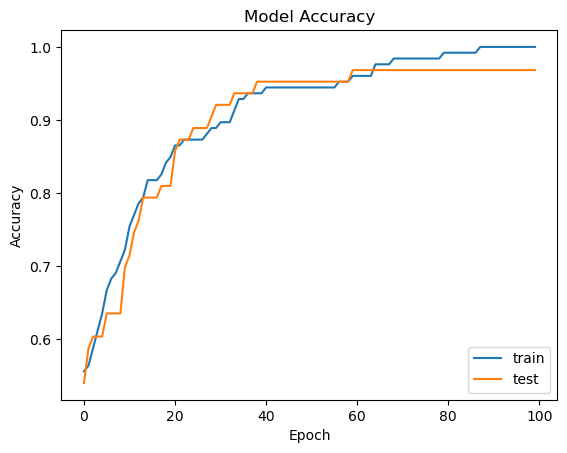

In [49]:
# Summarize History for Accuracy
plt.plot(ANN_record.history['accuracy'])
plt.plot(ANN_record.history['val_accuracy'])
plt.legend(['train','test'],loc='lower right')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

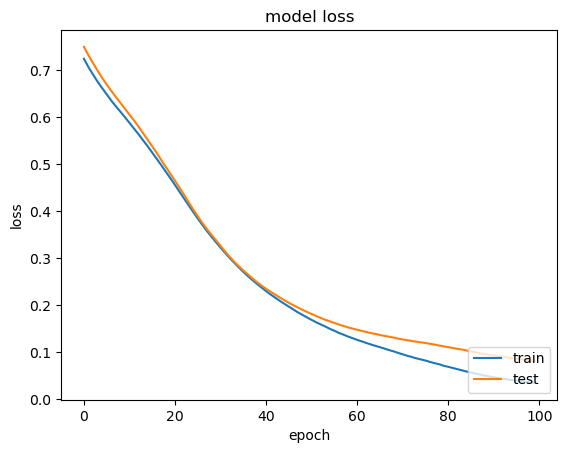

In [50]:
# summarize history for loss
plt.plot(ANN_record.history['loss'])
plt.plot(ANN_record.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

In [51]:
# Part 3 : Making Predictions and Evaluating the Model
# Predicting the test set results
Y_prediction=ANN_model.predict(X_test)
Y_predicted=(Y_prediction>0.5)
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test,Y_predicted)
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(Y_predicted,Y_test)

3/3 [==============================] - 0s 2ms/step


In [52]:
print("Accuracy of the ANN model is:",score)

Accuracy of the ANN model is: 0.9876543209876543


In [53]:
cm

array([[49,  0],
       [ 1, 31]], dtype=int64)

#### RNN

In [54]:
# Initializing the RNN
RNN_model = Sequential()
# Model Building
RNN_model.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))
RNN_model.add(Dense(8, activation='relu'))
RNN_model.add(Dropout(0.5))
RNN_model.add(Dense(1, activation='sigmoid'))
# Compile model
RNN_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
RNN_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 32)                480       
                                                                 
 dense_4 (Dense)             (None, 8)                 264       
                                                                 
 dropout (Dropout)           (None, 8)                 0         
                                                                 
 dense_5 (Dense)             (None, 1)                 9         
                                                                 
Total params: 753 (2.94 KB)
Trainable params: 753 (2.94 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [55]:
X_train

array([[ 0.2468849 ,  0.66539319,  0.81803947, ..., -0.72413882,
         0.62605955, -0.93342762],
       [-1.18040026,  0.66539319, -1.25725529, ..., -0.72413882,
        -0.91731335, -0.93342762],
       [-0.0824886 ,  0.66539319,  0.81803947, ...,  0.31269631,
         1.14051719,  1.07132034],
       ...,
       [ 0.2468849 , -1.50287082,  0.81803947, ..., -0.72413882,
        -0.91731335, -0.93342762],
       [-0.4118621 ,  0.66539319, -0.21960791, ..., -0.72413882,
        -0.91731335, -0.93342762],
       [-0.63144443, -1.50287082,  0.81803947, ..., -0.72413882,
        -0.91731335, -0.93342762]])

In [56]:
Y_train

,Presence
84,0
251,0
92,1
201,1
126,1
...,...
20,1
188,0
71,0
106,0


In [57]:
X_train.shape

(189, 14)

In [58]:
Y_train.shape

(189, 1)

In [59]:
X_test.shape

(81, 14)

In [60]:
Y_test.shape

(81, 1)

In [61]:
# Fit the model
RNN_record=RNN_model.fit(X_train,Y_train,validation_split=0.33,batch_size=20,epochs = 100)
# evaluate the model
scores=RNN_model.evaluate(X_train,Y_train)
print("\n%s: %.2f%%" % (RNN_model.metrics_names[0],scores[0]*100))
print("\n%s: %.2f%%" % (RNN_model.metrics_names[1],scores[1]*100))

Epoch 1/100
7/7 [==============================] - 1s 24ms/step - loss: 0.6890 - accuracy: 0.5238 - val_loss: 0.7019 - val_accuracy: 0.5238
Epoch 2/100
7/7 [==============================] - 0s 11ms/step - loss: 0.6749 - accuracy: 0.5794 - val_loss: 0.6721 - val_accuracy: 0.5238
Epoch 3/100
7/7 [==============================] - 0s 10ms/step - loss: 0.6704 - accuracy: 0.5238 - val_loss: 0.6470 - val_accuracy: 0.5238
Epoch 4/100
7/7 [==============================] - 0s 8ms/step - loss: 0.6066 - accuracy: 0.7063 - val_loss: 0.6254 - val_accuracy: 0.5238
Epoch 5/100
7/7 [==============================] - 0s 9ms/step - loss: 0.5981 - accuracy: 0.6429 - val_loss: 0.6060 - val_accuracy: 0.5238
Epoch 6/100
7/7 [==============================] - 0s 8ms/step - loss: 0.5860 - accuracy: 0.6508 - val_loss: 0.5883 - val_accuracy: 0.5238
Epoch 7/100
7/7 [==============================] - 0s 8ms/step - loss: 0.5680 - accuracy: 0.6429 - val_loss: 0.5717 - val_accuracy: 0.5714
Epoch 8/100
7/7 [=======

In [62]:
# Comparing Validation and training results
print(RNN_record.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


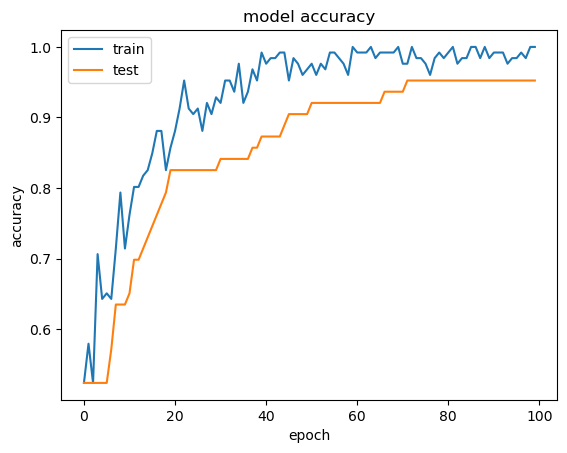

In [63]:
# summarize history for accuracy
plt.plot(RNN_record.history['accuracy'])
plt.plot(RNN_record.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

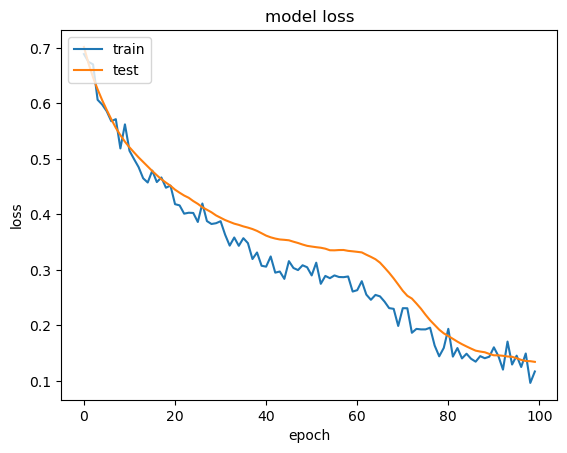

In [64]:
# summarize history for loss
plt.plot(RNN_record.history['loss'])
plt.plot(RNN_record.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [65]:
# Part 3 : Making Predictions and Evaluating the Model
# Predicting the test set results
Y_prediction=RNN_model.predict(X_test)
Y_predicted=(Y_prediction>0.5)
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test,Y_predicted)
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(Y_predicted,Y_test)
print("Accuracy of the ANN model is:",score)

3/3 [==============================] - 0s 2ms/step
Accuracy of the ANN model is: 0.9629629629629629


In [66]:
cm

array([[49,  0],
       [ 3, 29]], dtype=int64)